# Self_driven Robot on rpi interacting with realtime CSV and camera feed 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

from PIL import Image
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Activation , Conv2D , MaxPooling2D, Lambda
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.metrics import categorical_crossentropy
# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from keras import models
from keras.layers.core import Dense , Flatten , Dropout 
from imgaug import augmenters as iaa
# from google.colab.patches import cv2_imshow

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
import cv2 

%matplotlib inline
# Any results you write to the current directory are saved as output.

# Load the Drive helper and mount
# from google.colab import drive

# This will prompt for authorization.
# drive.mount('/content/drive/')

In [2]:
train_names = "./vin_data.csv"
train_imgs = "./images_folder/" 

train_names = pd.read_csv(train_names)
train_names.head()

,a,b,c
0,80,18,2
1,52,36,10
2,91,18,61
3,32,47,65


In [3]:
trainX , testX , trainY , testY = train_test_split(train_names['Id'], train_names['Data'], test_size=0.1 , random_state=42)

KeyError: 'Id'

In [10]:
# Doing the operation with images
def merging_imgs(name_of_image, train_predict_imgs_path):
  
    red_path = train_predict_imgs_path + str(name_of_image+".jpg")
#     print(red_path)
    img = cv2.imread(red_path, 1)
    img = cv2.resize(img , (60, 60))
#     cv2_imshow(img)
    return img

def data_maker(train_data , target_data, train_predict_img_dir, no_of_images):
#     img_dir = os.listdir(train_predict_img_dir)
    
    train_val_lst = train_data.tolist() 
    target_val_lst = target_data.tolist()
    
    img_lst =[]; target_lst= []
    
#     z =0
    for i in train_data[:int(no_of_images)]:
#         print(z)
        val = train_val_lst.index(i)
        target_val = str(target_val_lst[val])
#         print(target_val)
      
        small_lst = [i for i in target_val]
        len_of_target = len(small_lst)
        
#         z = z +1
        img = merging_imgs(i, train_predict_img_dir)  
        for i in range(len_of_target):
            if i%2 == 0:
                img_lst.append(img)
                target_lst.append(small_lst[i])
            else:
                img_lst.append(augment(img))
                target_lst.append(small_lst[i])

    return np.array(img_lst) , np.array([int(i) for i in target_lst])


def augment(image):
        augment_img = iaa.Sequential([
            iaa.OneOf([
                iaa.Affine(rotate=0),
                iaa.Affine(rotate=90),
                iaa.Affine(rotate=180),
                iaa.Affine(rotate=270),
                iaa.Fliplr(0.5),
                iaa.Flipud(0.5),
            ])], random_order=True)        
        image_aug = augment_img.augment_image(image)
        return image_aug


In [11]:
test_img_data , test_target_data = data_maker(testX , testY , train_imgs, len(testX)) # 224
imgs , targets = data_maker(trainX , trainY , train_imgs, len(trainX))

print(len(test_img_data)); print(len(test_target_data))
print(len(imgs)); print(len(targets))

NameError: name 'testX' is not defined

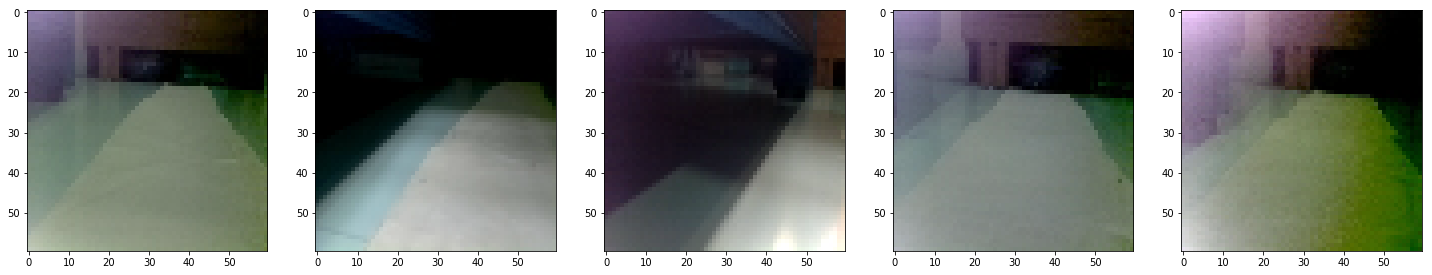

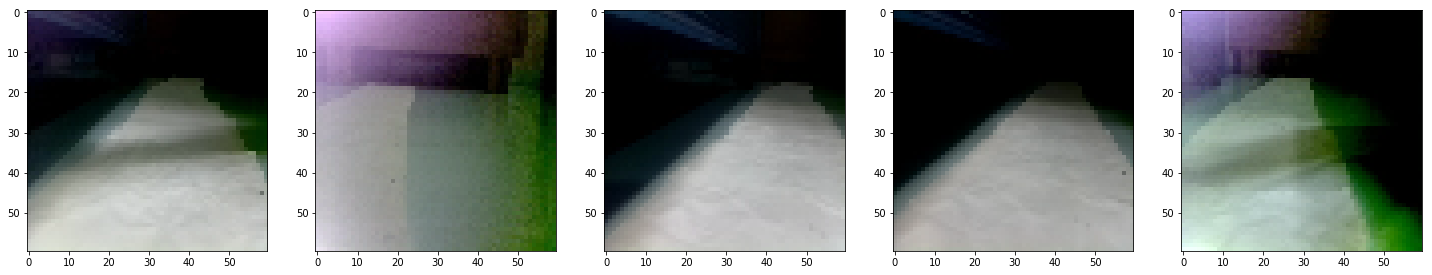

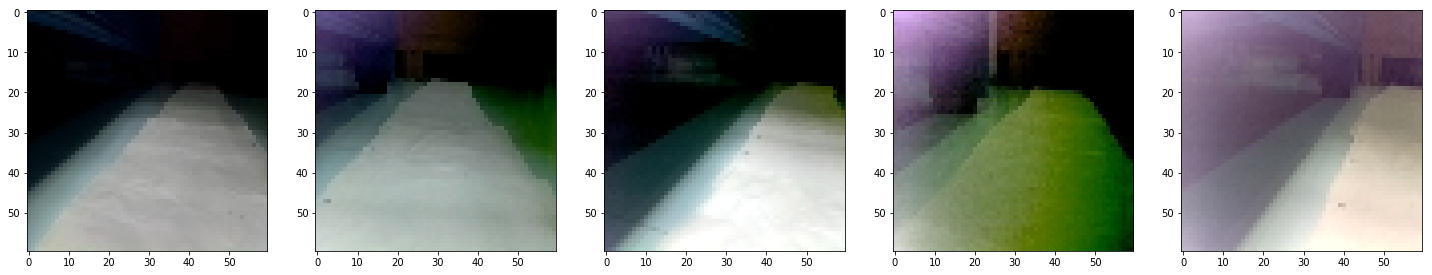

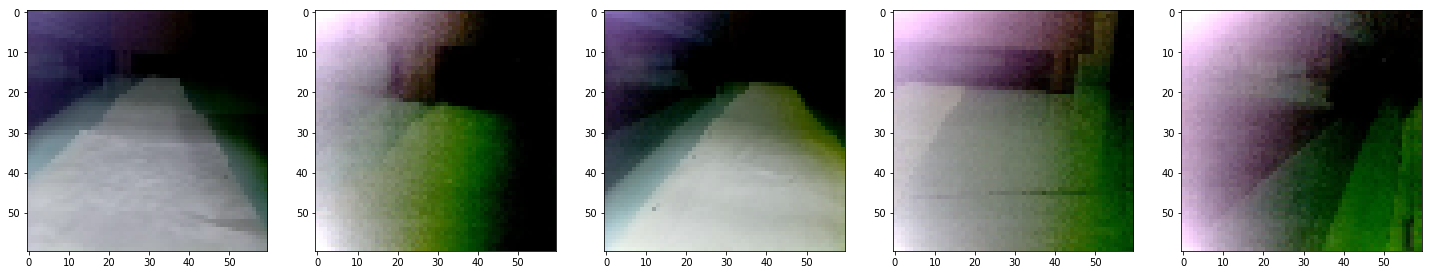

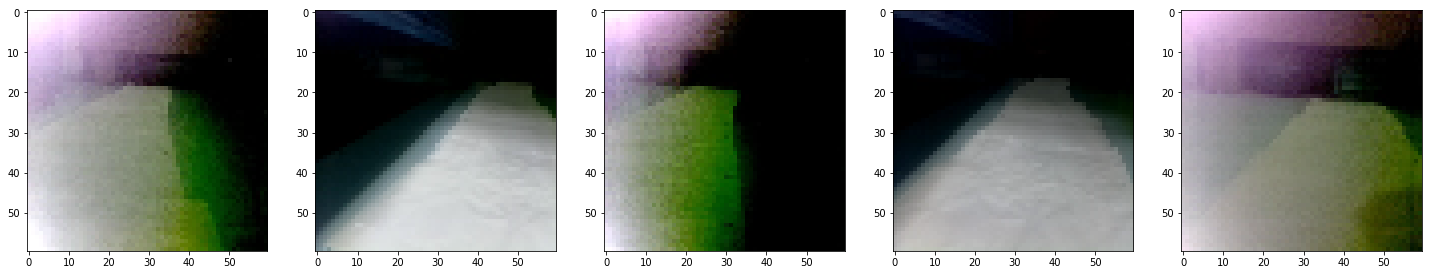

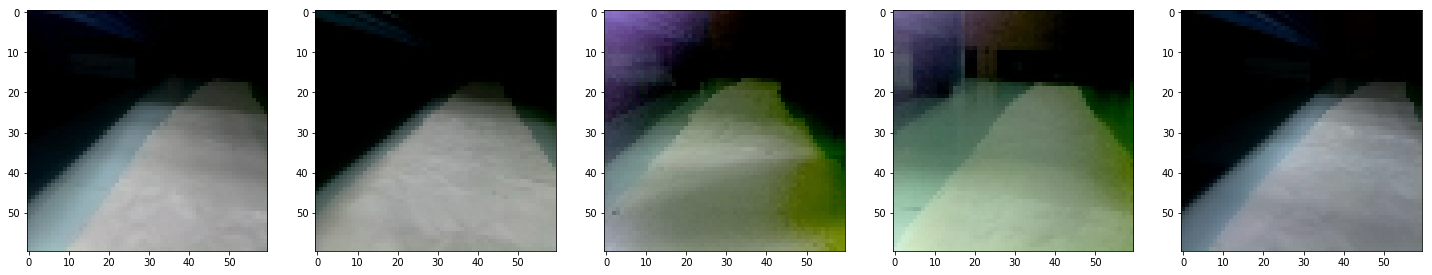

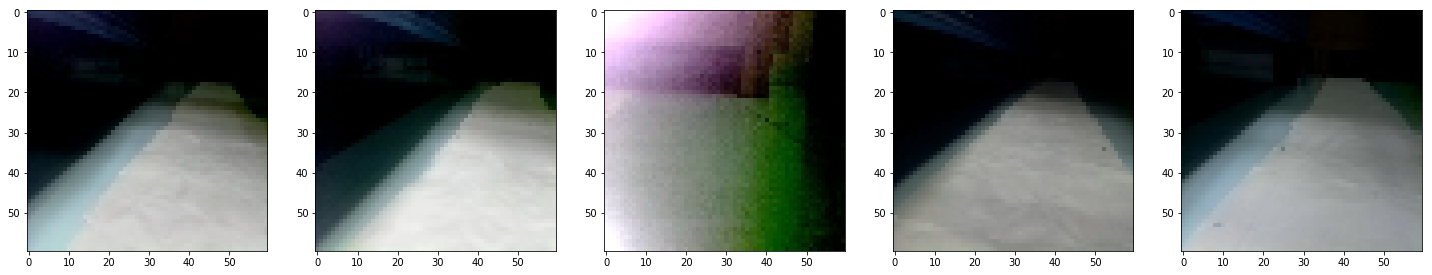

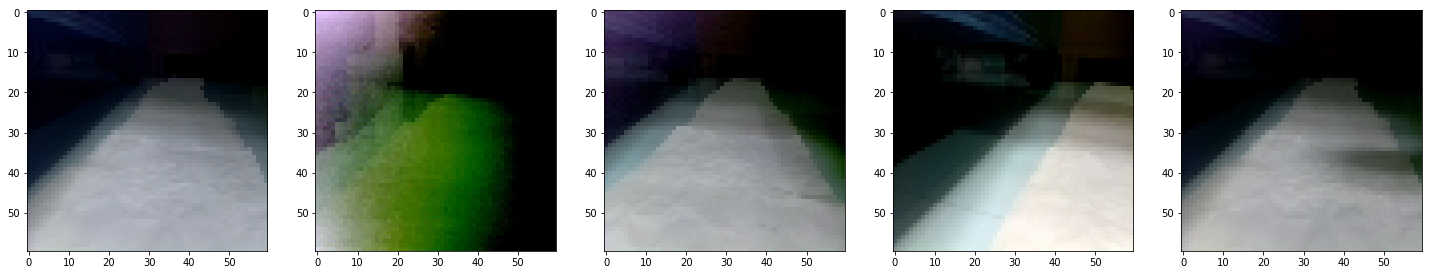

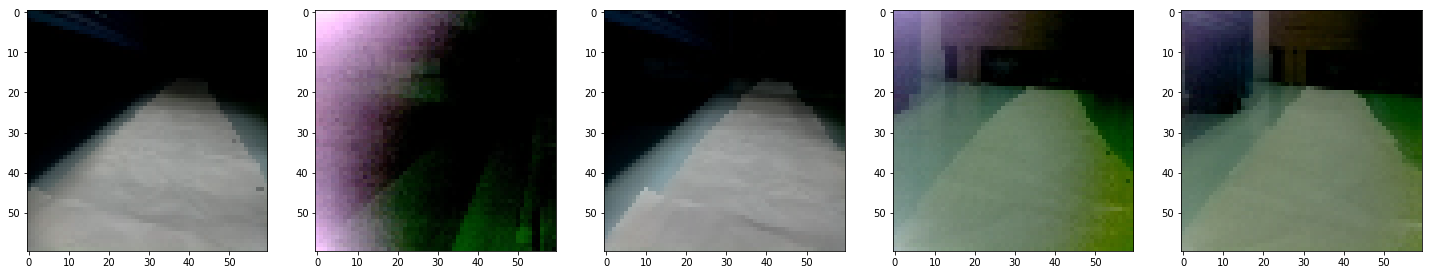

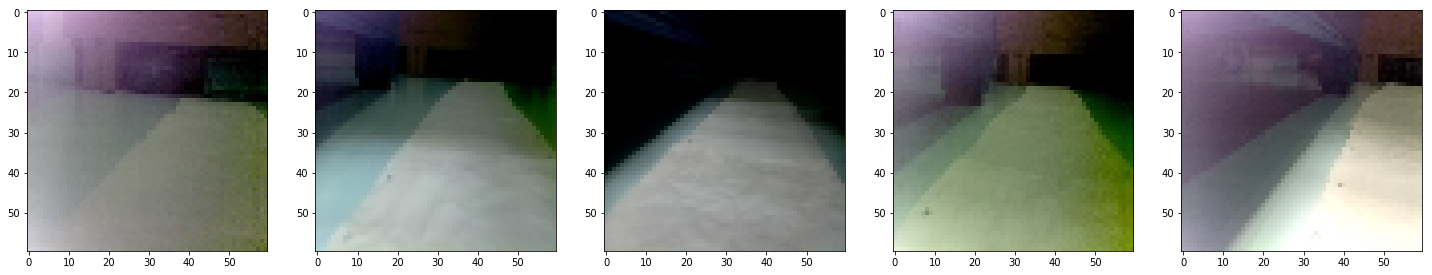

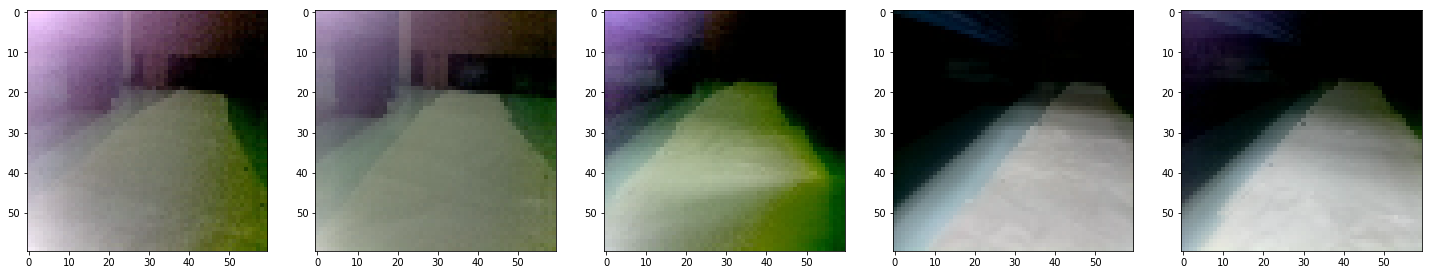

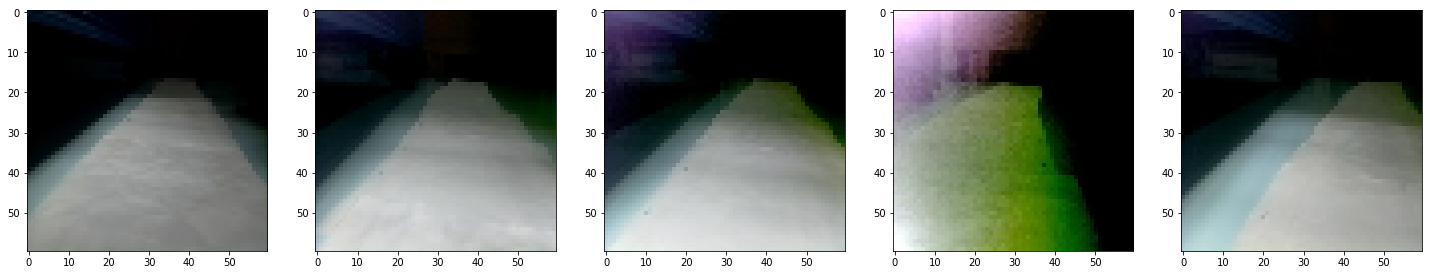

In [6]:
for i in range(60):
        if (i % 5) == 0:
            fig, ax = plt.subplots(1,5,figsize=(25,5)) 
        else:
            k = i
            for j in range(5):
                ax[j].imshow(imgs[k])
                k = k + 1

***Now, Doing One Hot Encding of labels or Target Values*** **bold text**

In [7]:
def one_hot_encoding(list_of_target):
    one_hot_lst = []
    lst = pd.get_dummies(np.unique(list_of_target))
    print(lst)
    for i in list_of_target:
        a = np.array(lst[i]).tolist()
        one_hot_lst.append(a)
    return np.array(one_hot_lst) , len(lst)

print(one_hot_encoding(targets))

   0  4
0  1  0
1  0  1
(array([[1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],


***Now, Making the Image Data genrator *** **bold text**

In [8]:
def image_generator(files,label_file, batch_size): 
    while True:
        index = np.random.choice(len(files),batch_size)

        batch_input = []
        batch_output = [] 
          
        for i in index:
            image = augment(files[i])
            batch_input += [ image ]
            batch_output += [ label_file[i] ]
          # Return a tuple of (input,output) to feed the network
        batch_x = np.array( batch_input )
        batch_y = np.array( batch_output )
        
        yield( batch_x, batch_y )

***Now, Code for loading & Saving the model***


In [9]:
def saving_model(model_instance,model_name):
    model_instance.save(str(model_name))
    print("Model Saved")
    
def loading_model(model_name):
    model = models.load_model(str(model_name))
    print("Model Loaded")
    return model

***Now, Making the Model***

In [10]:
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(80,80,3)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(2, activation='softmax'))
# learning_rates = [0.001,0.0001,0.00001]

SHAPE = (60,60,3)
model = Sequential()
model.add(Conv2D(24,5,5 , activation='elu', input_shape=(60,60,3)))
# model.add(Lambda(lambda x: x/127.5-1.0, input_shape=SHAPE))
model.add(Conv2D(36,5,5 , activation='elu'))
# model.add(Conv2D(24,5,5 , activation='elu'))
model.add(Conv2D(48,5,5 , activation='elu'))
model.add(Conv2D(64,5,5 , activation='elu'))
model.add(Conv2D(64,3,3 , activation='elu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100, activation='elu'))
model.add(Dense(50, activation='elu'))
model.add(Dense(10, activation='elu'))
model.add(Dense(2))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


c:\users\vinay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="elu", input_shape=(60, 60, 3...)`
  
c:\users\vinay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu")`
c:\users\vinay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu")`
c:\users\vinay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="elu")`
c:\users\vinay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activatio

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 56, 56, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 48)        43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 64)        76864     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 42, 42, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 42, 42, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 112896)            0         
__________

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
datagen = ImageDataGenerator(rotation_range=15,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.9, 1.25],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',
                               data_format='channels_last',
                               brightness_range=[0.5, 1.5])
datagen.fit(imgs)
history = model.fit_generator(datagen.flow(imgs, one_hot_encoding(targets)[0], batch_size=4),
                        steps_per_epoch=len(imgs) / 4,
                        validation_data=datagen.flow(test_img_data, one_hot_encoding(test_target_data)[0], batch_size=4),
                        validation_steps=len(test_img_data) / 4,
                        epochs=100)
    
# ------------------------- THIS IS FOR BLACK & WHITE IMGS DATASET ----------------------------
# x_train = imgs.reshape(imgs.shape[0], 80, 80, 1)
# x_test = test_img_data.reshape(test_img_data.shape[0], 80, 80, 1)

# history= model.fit(x_train, one_hot_encoding(targets)[0],
#           batch_size=2,
#           epochs=5,
#           verbose=1,
#           validation_data=(x_test, one_hot_encoding(test_target_data)[0]))

   0  4
0  1  0
1  0  1
   0  4
0  1  0
1  0  1
Epoch 1/100
48/48 [==============================] - 25s 516ms/step - loss: 1.1687 - acc: 0.8333 - val_loss: 0.4036 - val_acc: 0.7727
Epoch 2/100
48/48 [==============================] - 24s 502ms/step - loss: 0.5927 - acc: 0.8125 - val_loss: 0.2372 - val_acc: 0.9545
Epoch 3/100
48/48 [==============================] - 24s 499ms/step - loss: 0.3630 - acc: 0.8698 - val_loss: 0.1958 - val_acc: 0.8636
Epoch 4/100
48/48 [==============================] - 24s 497ms/step - loss: 0.5972 - acc: 0.8594 - val_loss: 0.3553 - val_acc: 0.8636
Epoch 5/100
48/48 [==============================] - 24s 509ms/step - loss: 0.6170 - acc: 0.6354 - val_loss: 0.3832 - val_acc: 1.0000
Epoch 6/100
48/48 [==============================] - 24s 499ms/step - loss: 0.3766 - acc: 0.8698 - val_loss: 0.2841 - val_acc: 0.8636
Epoch 7/100
48/48 [==============================] - 24s 504ms/step - loss: 0.3788 - acc: 0.9062 - val_loss: 0.1647 - val_acc: 0.9091
Epoch 8/100
48

In [13]:
print(imgs.shape)
# print(x_train.shape)

(192, 60, 60, 3)


***Now, Saving the model funtion***

In [30]:
# Saving the model 
saving_model(model , "new_vin_model_e100_p60_v3_0.1_super-model.h5")

Model Saved


***Evaluating the model performace ***

In [23]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


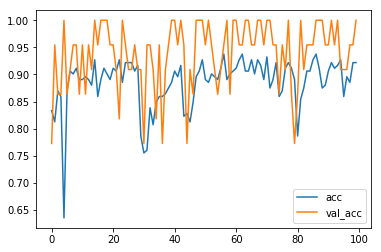

In [24]:
# plt
plt.plot(history.epoch, history.history['acc'] , label="acc")
plt.plot(history.epoch, history.history['val_acc'] , label = "val_acc")
plt.legend()
plt.show()

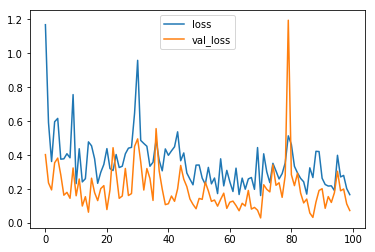

In [25]:
# plt
plt.plot(history.epoch, history.history['loss'] , label = "loss")
plt.plot(history.epoch, history.history['val_loss'] , label = "val_loss")
plt.legend()
plt.show()

In [26]:
# Now Making the Prediction and Evaluating the model
score = model.evaluate(test_img_data, one_hot_encoding(test_target_data)[0], verbose = 0)
# score = model.evaluate(x_test, one_hot_encoding(test_target_data)[0], verbose = 0)
print("%s: %.2f%%" % ("acc", score[1]*100))

   0  4
0  1  0
1  0  1
acc: 100.00%


### predicting the model on test dataset

In [27]:
prob = model.predict(test_img_data)
# prob = model.predict(x_test)
classes = prob.argmax(axis=-1)
print(prob)
print(classes)

[[ 3.14738000e+05  7.24699392e+08]
 [-1.29980040e+07  9.13486080e+08]
 [-3.25755025e+06  8.89886656e+08]
 [ 6.28619136e+08  3.72778720e+07]
 [-8.53497600e+06  8.73761856e+08]
 [-7.97791375e+05  1.26773000e+08]
 [-1.43915670e+07  5.25953824e+08]
 [ 3.83463440e+07  6.60023360e+08]
 [ 8.80779400e+06  8.71447360e+08]
 [-2.22986820e+07  1.03829146e+09]
 [-3.50606975e+06  8.73750208e+08]
 [-6.08094000e+05  8.69236992e+08]
 [ 1.15355500e+06  8.29715264e+08]
 [ 7.35816050e+06  8.70352896e+08]
 [-1.93964375e+06  3.60730272e+08]
 [ 1.11912256e+09  3.69498688e+08]
 [ 6.36133760e+08  2.05396544e+08]
 [ 9.87032000e+05  3.24431840e+08]
 [-6.07930550e+06  8.70151424e+08]
 [ 3.22783050e+06  8.68730048e+08]
 [ 6.70592384e+08  4.79438464e+08]
 [ 9.69613376e+08  6.10434368e+08]]
[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0]


In [28]:
test_target_data

array([4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 0, 0])